# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [51]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: Just looking at the variation by considering the min and max of the table, we could definitely observe a dimension with capturing high variation of "Fresh","Milk", and "Grocery".  The variance along the principal components play a large role in selecting dimensions. The PCA dimensions tries to mutually orthogonal, maximize variance and has an ordered set of features. 

Ica helps identify independent components by maximizing independence of the estimated components. Therefore ICA vectors are vectors in an matrix called 'unmixing' matrix which assumes independence among the dimensions and gives the best possible matrix to reconstruct the information. ICA dimensions are therefore mutually independent, maintains maximal mutual information and has a 'bag' of features. Doesn't really care about the order of the features. 

For ICA, I will expect one or two dimensions with "Fresh" and "Delicatessen" that captures the maximum mutual information as well as one with "Detergents_paper","Frozen" and "Milk" as the components tries to capture 'independent' components by maxmimizing "non-gaussianity" of the distributions of the sources. I think these dimensions I described will have a lot of variation in their non-gaussianity distribution. 


###PCA

In [54]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: After the first two dimensions, variance drop off considerably. The first two dimensions contribute to 86% of total variance. There is no simple stop rule for pca to choose the dimensions but we can start with dimensions with high variations and add dimensions one at a time while computing the score of accuracy of your model and stop when it starts to decrease.

For the third basis vector, we can see "Fresh" and "Delicatessen" variations are captured much better than the others. 
For the First basis vector, we can see almost all the of category variations have been captured except for "Fresh". 



In [63]:
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

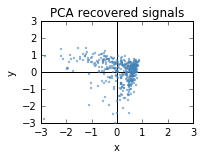

In [64]:
#Plotting PCA variance

S_pca_ = pca.fit(data).transform(data)
plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represent how best they could maximize the variation along the orthogonal axis and therefore minimize the loss of information. In case of 'curse of dimensionality', we could employ PCA to do a 'dimensionality reduction' while preserving information as best as possible. As a result, the computation becomes faster and efficient.  

###ICA

In [72]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=6)
data /= data.std(axis=0)
ica.fit(data)

# Print the independent components
print ica.components_


[[-0.00340939  0.01917331  0.10807365 -0.00726019 -0.13329657 -0.01606675]
 [-0.00242661  0.01248426 -0.07064461 -0.00133132  0.01528073  0.00554323]
 [-0.00194353 -0.07237966  0.05677605  0.00163741 -0.01779576  0.01691849]
 [ 0.01093703  0.00107952 -0.00734482 -0.05411988  0.00254776  0.01678737]
 [-0.05032291  0.00644589  0.00735914  0.00320997 -0.01140348  0.00274511]
 [-0.00491035 -0.0015389  -0.00561675 -0.00251914  0.00239891  0.05098223]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?
For the 

Answer: The components_ gives the unmixing matrix. ICA assumes independence on the source variables. With this unmixing matrix available, we can apply the model over another set of measurements and separate the sources. 

Simply X = SA where X = data matrix, S is the set of principal independent components, and A is the mixing matrix. In other words, S = X.A^-1 where A^-1 is the unmixing matrix. 

On the first vector, we see Frozen and Delicatessan weights are higher and hence the component will be able to reconstruct the Frozen and Delivatessan much better.

On the second, we will be able to reconstruct Milk and Detergents_Paper much better. 

On the third, we will be able to reconstruct Detergents_Paper much better than the others.

On the ourth, Fresh and Detergents_Paper could be reconstruct out much better than the others. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
        K-means is 
         a. compuationally efficient
         b. runs usually fast - converges using local minimum
         c. cluster scatter is calculated as a measure of eucladian distance
         
        GMM is 
         a. it is the fastest algorithm for learning mixture models
         b. It can also draw confidence ellipsoids for multivariate models, 
         c. and compute the Bayesian Information Criterion to assess the number of clusters in the data.            S

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[-0.19307077  0.30475306]
 [-0.43392596  0.32803921]
 [-0.81022096 -0.81416893]
 [ 0.7777625  -0.65201155]
 [-0.16609819 -1.26998809]
 [ 0.15599237  0.29480541]
 [ 0.33490718  0.52440632]
 [-0.14042659  0.23073005]
 [ 0.51673134  0.65861312]
 [-1.59029884  0.74016879]]


In [40]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(init='k-means++', n_clusters=5, n_init=10)#?
clusters.fit(reduced_data)
print clusters



KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [47]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(reduced_data)
        bic.append(gmm.bic(reduced_data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
clusters=best_gmm
print clusters

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [48]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [49]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

#centroids = clusters.cluster_centers_
centroids = clusters.means_
print centroids

[[-0.63021109  0.7424089 ]
 [ 0.21522115 -0.76073353]
 [-4.20372128 -0.11599793]
 [-2.7983985  -7.61716786]
 [ 0.98114704  0.07904745]]


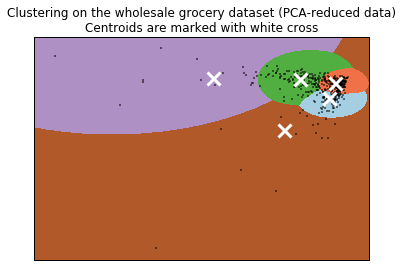

In [34]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

** 7) ** What are the central objects in each cluster? Describe them as customers.

Answer: There are five clusters are they are visible clearly. In each cluster, we have a set of customers whose spending habits are closer to the centroids (which are the central objects) of the cluster. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: GMM gave the most insight into the data. The main advantage we have is the abilitiy to determine the number of components in an efficient way using BIC Criterion which I also implemented and figured out the best cluster parameters to use. 

It is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. Taken from http://scikit-learn.org/stable/modules/mixture.html#pros

**9)** How would you use that technique to help the company design new experiments?

Answer: A/B testing allows individuals, teams, and companies to make careful changes to their user experiences while collecting data on the results.

Using the above technique, we can now have five different clusters or segments of customers. Instead of implementing a completely different delivery option on all customers, we will treat the segements independently and test the delivery changes using A/B testing method on each group. 

Depends on the response for each control group, we will decide whether to rollout the delivery options to the entire segement of the customers. We will repeat the process for all five customer segements.

**10)** How would you use that data to help you predict future customer needs?

Answer: Having decided that we are going to treat the identified segments independently, we can build supervised techniques like randomForest, DecisionTree to build a model with the target being the number of items sold in each category (derived from total spend). 

Once we have built the models,we can split them as train and test sets, fit a model for every category of food (mnilk, fresh,etc) over evey single segment then use the test to predict the demand. 

Once have build models with sufficient accuracy, we can then group a set of new customers as a test set, identify what cluster they will belong in (unsupervised) and then apply the correct supervised trained model to make the prediction. The key lesson is that we will have different supervised model for each segmentation.